# Visualization of WAV file
In this notebook, we extract bytes from wav file and experiment with different ways to visualize the data, including more traditional plot of signal and other methods such as rectangles of different colors and shapes.

## 1. Audio Representation 

In [2]:
file_name = "../FMP_1/data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-20_Karajan1946.wav"

Read audio and display it with sound 

In [3]:
import numpy as np
import librosa
import IPython

IPython.display.Audio(file_name)

Read audio as byte stream and remove metadata to get the data trunk

In [4]:
file = open(file_name, 'rb')
content = file.read()
content_str = content.hex()

content_str[:32]

'5249464616570e0057415645666d7420'

In [5]:
meta_size = 46
data = content[meta_size:]

ls = [int.from_bytes(data[i:i+2], "little", signed="true") for i in range(0, len(data), 2)]
print(ls[:100])

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


To visualize the wav data, we can first plot them against time and reconstruct the music signal

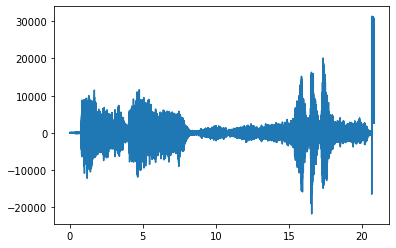

In [6]:
import matplotlib.pyplot as plt

Fs = 22560
t = np.arange(len(ls)) / Fs

plt.plot(t,ls)

To visualize the wave data with different colors, we first need a function that maps wav data to rgb values

In [29]:
def data_to_rgb(val):
    # Map (-32768, 32767) in wav data to rgb (0,255)
    
    val = abs(val)*4 % 255
    return val

We can also have a function to draw rectangles

In [43]:
from PIL import Image, ImageDraw
from IPython.display import display

def draw_rectangles(color_arr):
    w, h = 1000, 200

    img = Image.new("RGB", (w, h)) 

    x0, y0, x1, y1 = 0, 0, 10, 200

    for i in range(100):
        img1 = ImageDraw.Draw(img)
        coor = [(x0, y0), (x1, y1)]

        img1.rectangle(coor, fill = color_arr[i])  

        x0 = x0 + 10
        x1 = x1 + 10

    print(ls[:100])
    display(img)

Then we can experiment with different combinations of rgb values to create different visualizations

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


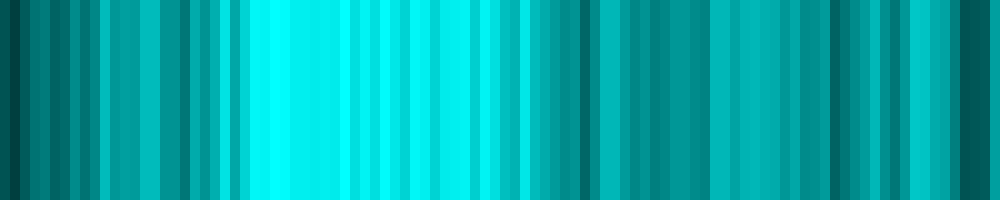

In [54]:
rgb_ls = [data_to_rgb(x) for x in ls]

color_arr = [(0, 255-x, 255-x) for x in rgb_ls]

draw_rectangles(color_arr)

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


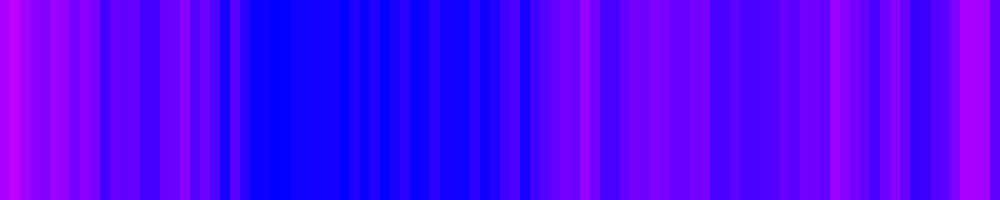

In [61]:
rgb_ls = [data_to_rgb(x) for x in ls]

color_arr = [(x, 0, 255) for x in rgb_ls]

draw_rectangles(color_arr)

We can even give it a nice shape corresponding to wav data

[43, 48, 41, 35, 33, 39, 37, 29, 35, 30, 17, 26, 24, 25, 17, 17, 27, 27, 34, 21, 27, 20, 7, 22, 11, 2, -3, 0, 1, -4, -4, -5, -4, -5, 0, 8, 3, -8, -1, -6, -11, -2, -4, 11, 5, 4, 3, -12, 3, 8, 16, 19, 6, 17, 21, 25, 29, 27, 38, 29, 18, 18, 25, 30, 27, 32, 30, 26, 26, 29, 31, 18, 18, 23, 19, 18, 20, 21, 26, 22, 29, 28, 25, 39, 34, 29, 25, 18, 28, 34, 26, 14, 15, 21, 23, 32, 43, 42, 41, 24]


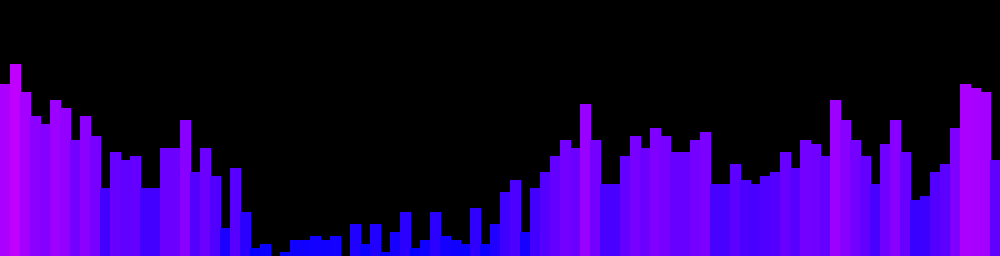

In [69]:
rgb_ls = [data_to_rgb(x) for x in ls]
color_arr = [(x, 0, 255) for x in rgb_ls]

w, h = 1000, 256
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 10, 256

for i in range(100):
    img1 = ImageDraw.Draw(img)
    coor = [(x0, 256-rgb_ls[i]), (x1, y1)]

    img1.rectangle(coor, fill = color_arr[i])  

    x0 = x0 + 10
    x1 = x1 + 10

print(ls[:100])
display(img)